In [6]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import requests
import pandas as pd
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=VZ&apikey=BAZWAMOYNWCQVIYA'
r = requests.get(url)
data = r.json()

data_df = pd.DataFrame(data['Time Series (Daily)'])
data_df = data_df.T
data_df = data_df.reindex(index=data_df.index[::-1])
data_df['4. close'] = data_df['4. close'].astype(float)

print(data_df['4. close'])

2022-10-25    36.43
2022-10-26    36.43
2022-10-27    36.18
2022-10-28    37.67
2022-10-31    37.37
              ...  
2023-03-14    36.88
2023-03-15    37.06
2023-03-16    36.58
2023-03-17    36.79
2023-03-20    37.43
Name: 4. close, Length: 100, dtype: float64


In [8]:
data_df.index

Index(['2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-31',
       '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-07',
       '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
       '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
       '2022-11-22', '2022-11-23', '2022-11-25', '2022-11-28', '2022-11-29',
       '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-05', '2022-12-06',
       '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12', '2022-12-13',
       '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
       '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
       '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04', '2023-01-05',
       '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
       '2023-01-13', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
       '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',

In [9]:
results_array = [float(i) for i in data_df['4. close'].tolist()]

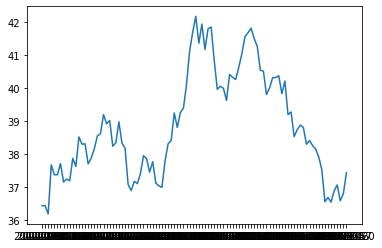

In [10]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

x = np.array(data_df.index)
y = np.array(results_array)

plt.plot(x,y)
plt.show()

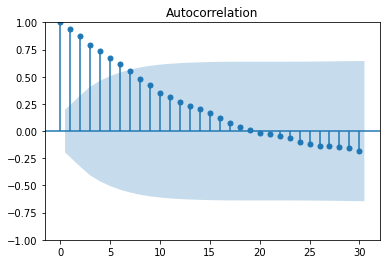

In [15]:
import statsmodels.api as sm
from matplotlib import pyplot
sm.graphics.tsa.plot_acf(results_array, lags=30)
pyplot.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


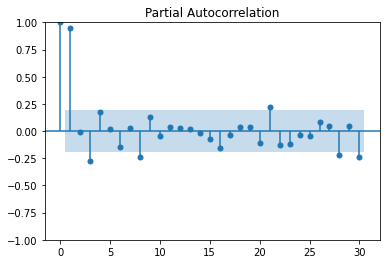

In [16]:
sm.graphics.tsa.plot_pacf(results_array, lags=30)
pyplot.show()

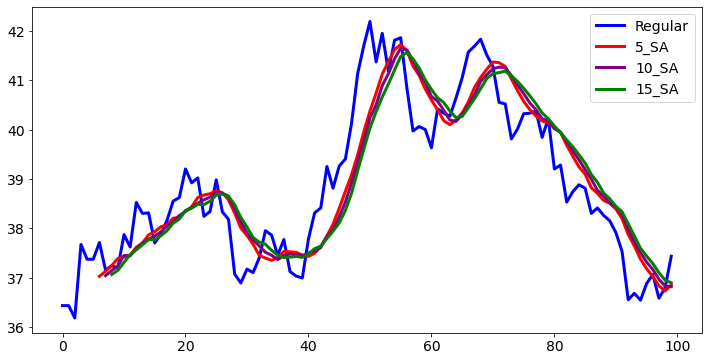

In [18]:
# modify ticks size
RA = pd.DataFrame()
RA['Regular'] = pd.DataFrame(results_array)
RA['5_SA'] = pd.DataFrame(results_array).rolling(7).mean()
RA['10_SA'] = pd.DataFrame(results_array).rolling(8).mean()
RA['15_SA'] = pd.DataFrame(results_array).rolling(9).mean()


# colors for the line plot
colors = ['blue', 'red', 'purple', 'green']

# line plot - the yearly average air temperature in Barcelona
RA.plot(color=colors, linewidth=3, figsize=(12,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Regular', '5_SA', '10_SA', '15_SA'], fontsize=14)

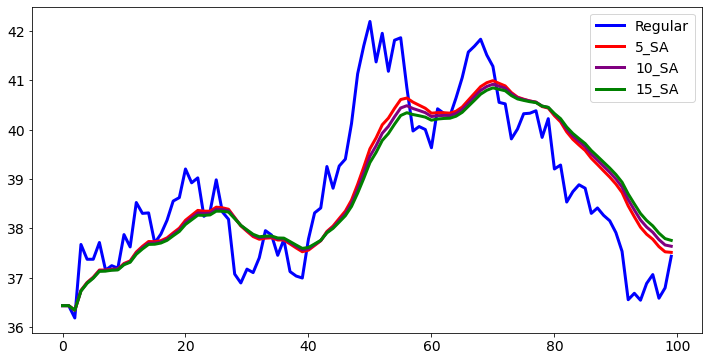

In [19]:
# modify ticks size
RA = pd.DataFrame()
RA['Regular'] = pd.DataFrame(results_array)
RA['5_SA'] = pd.DataFrame(results_array).ewm(7).mean()
RA['10_SA'] = pd.DataFrame(results_array).ewm(8).mean()
RA['15_SA'] = pd.DataFrame(results_array).ewm(9).mean()


# colors for the line plot
colors = ['blue', 'red', 'purple', 'green']

# line plot - the yearly average air temperature in Barcelona
RA.plot(color=colors, linewidth=3, figsize=(12,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Regular', '5_SA', '10_SA', '15_SA'], fontsize=14)

In [20]:
#From the partial autocorrelation plot, there is still one point after the first point that is high.  Probably will need to be integrated once or twice before it becomes stationary.

In [21]:
import requests
import pandas as pd
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=T&apikey=BAZWAMOYNWCQVIYA'
r = requests.get(url)
data = r.json()

data_df = pd.DataFrame(data['Time Series (Daily)'])
data_df = data_df.T
data_df = data_df.reindex(index=data_df.index[::-1])
data_df['4. close'] = data_df['4. close'].astype(float)

print(data_df['4. close'])

2022-10-25    17.69
2022-10-26    18.14
2022-10-27    18.03
2022-10-28    18.48
2022-10-31    18.23
              ...  
2023-03-14    18.44
2023-03-15    18.31
2023-03-16    18.39
2023-03-17    18.13
2023-03-20    18.49
Name: 4. close, Length: 100, dtype: float64


In [22]:
results_array = [float(i) for i in data_df['4. close'].tolist()]

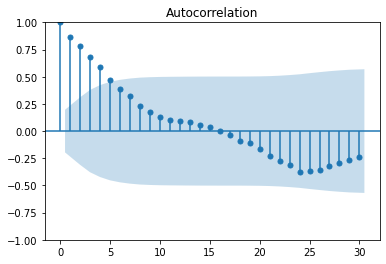

In [23]:
sm.graphics.tsa.plot_acf(results_array, lags=30)
pyplot.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


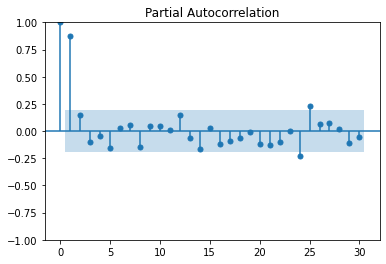

In [24]:
sm.graphics.tsa.plot_pacf(results_array, lags=30)
pyplot.show()

In [25]:
#From the partial autocorrelation plot, there is still one point after the first point that is high.  Probably will need to be integrated once or twice before it becomes stationary.

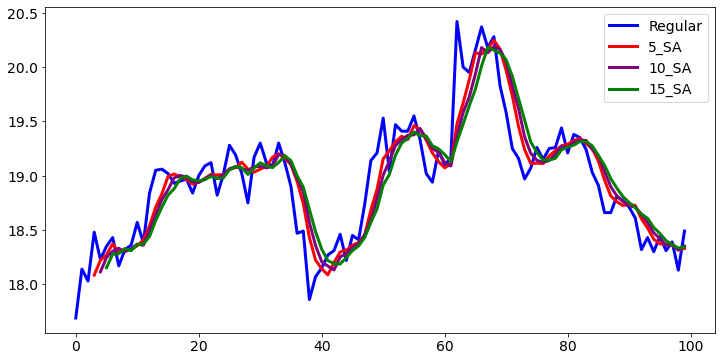

In [26]:
# modify ticks size
RA = pd.DataFrame()
RA['Regular'] = pd.DataFrame(results_array)
RA['5_SA'] = pd.DataFrame(results_array).rolling(4).mean()
RA['10_SA'] = pd.DataFrame(results_array).rolling(5).mean()
RA['15_SA'] = pd.DataFrame(results_array).rolling(6).mean()


# colors for the line plot
colors = ['blue', 'red', 'purple', 'green']

# line plot - the yearly average air temperature in Barcelona
RA.plot(color=colors, linewidth=3, figsize=(12,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Regular', '5_SA', '10_SA', '15_SA'], fontsize=14)

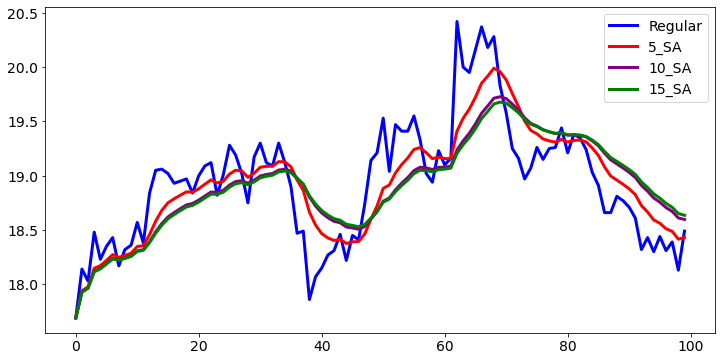

In [27]:
# modify ticks size
RA = pd.DataFrame()
RA['Regular'] = pd.DataFrame(results_array)
RA['5_SA'] = pd.DataFrame(results_array).ewm(4).mean()
RA['10_SA'] = pd.DataFrame(results_array).ewm(8).mean()
RA['15_SA'] = pd.DataFrame(results_array).ewm(9).mean()


# colors for the line plot
colors = ['blue', 'red', 'purple', 'green']

# line plot - the yearly average air temperature in Barcelona
RA.plot(color=colors, linewidth=3, figsize=(12,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Regular', '5_SA', '10_SA', '15_SA'], fontsize=14)